# Question D3

*Question*: What is the size of the organization you currently work for?

*Answer Type*: Single Option

*Options*: [1-10 employees, 11-50 employees, 51-250 employees, 251-500 employees, 501-1,000 employees, 1,001-2,000 employees, More than 2,000 employees]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

### Basic Analysis

In [3]:
dataframe_obj.df['D3_Company_Size'].head()

0        1,001-2,000 employees
1    More than 2,000 employees
2             51-250 employees
3    More than 2,000 employees
4          501-1,000 employees
Name: D3_Company_Size, dtype: object

In [4]:
# mapping of old labels to new one
d3_rename_mapping = {
    '1-10 employees': '1-10',
    '11-50 employees': '11-50',
    '51-250 employees': '51-250',
    '251-500 employees': '251-500',
    '501-1,000 employees': '501-1000',
    '1,001-2,000 employees': '1001-2000',
    'More than 2,000 employees': '+2000'
}

In [5]:
# update values in D3 column
dataframe_obj.df['D3_Company_Size'] = rename_values(rename_mapping=d3_rename_mapping,  
                                                    values=list(dataframe_obj.df['D3_Company_Size']))

In [6]:
# cleaning data
dataframe_obj.remove_value_from_df('0','D3_Company_Size')

In [7]:
# barplot data
indexes = list(dataframe_obj.df['D3_Company_Size'].value_counts().index)
values = list(dataframe_obj.df['D3_Company_Size'].value_counts())

In [8]:
# plot object
d3_plot = PlotUtils(pd.DataFrame(
    data={'Company Size': indexes, 'Answers': values}
))

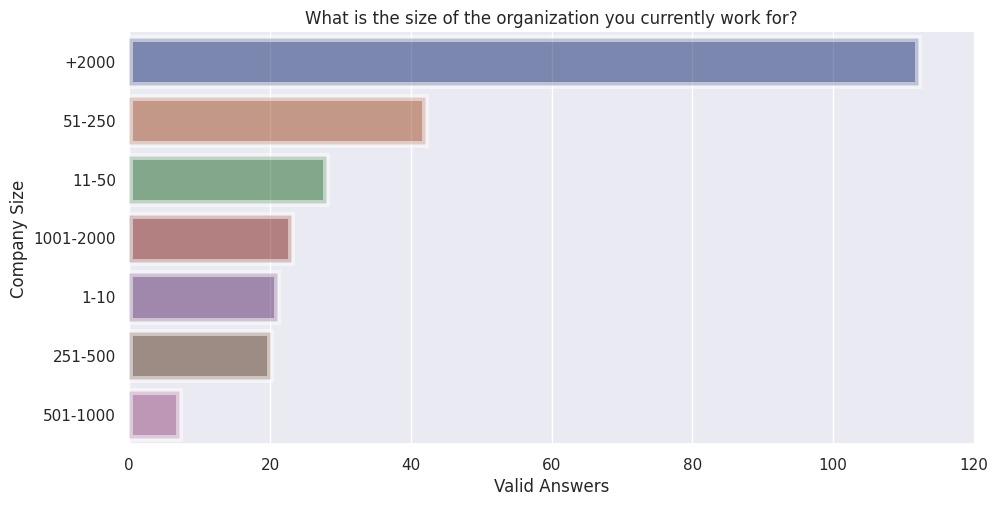

In [9]:
d3_plot.single_barplot(x_axis="Answers", y_axis="Company Size", 
                       title="What is the size of the organization you currently work for?",
                       x_label="Valid Answers", y_label="Company Size", x_label_rotation=0)

### Bootstrapping Analysis

In [10]:
valid_options_list = list(dataframe_obj.df['D3_Company_Size'].unique())
valid_answers_list = list(dataframe_obj.df['D3_Company_Size'])

In [11]:
bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, 1000, 1000, 0.95)

In [12]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping()

In [13]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']

In [14]:
# plot object for bootstrapped data
d3_boot_plot = PlotUtils(pd.DataFrame(
    data={'Company Size': indexes, 'Value': values}
).sort_values(by=['Value'], ascending=False))

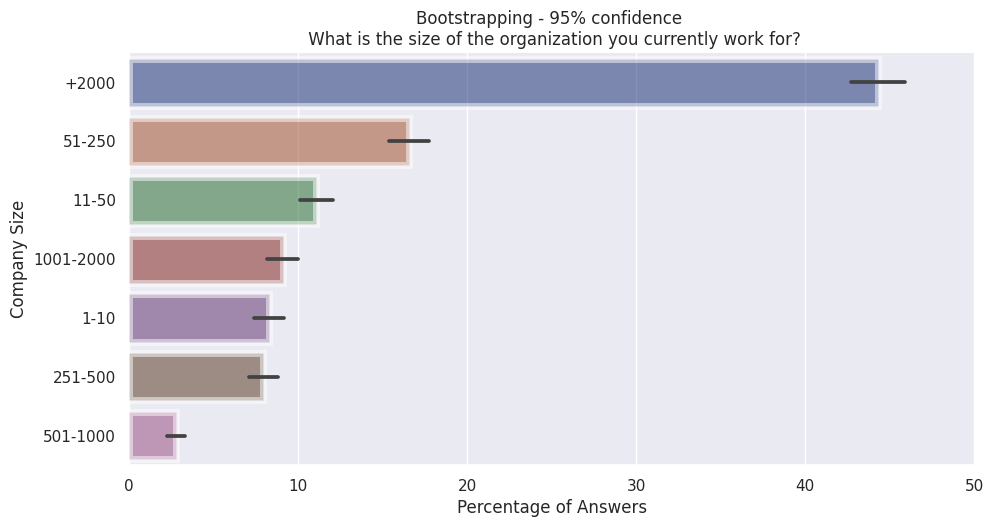

In [15]:
d3_boot_plot.single_barplot(x_axis="Value", y_axis="Company Size", 
                       title="Bootstrapping - 95% confidence \n What is the size of the organization you currently work for?",
                       x_label="Percentage of Answers", y_label="Company Size", x_label_rotation=0)

In [16]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
1001-2000:(9.051217626198325, 9.0787, 9.106182373801675)
+2000:(44.26020453391446, 44.3078, 44.35539546608554)
51-250:(16.523794221698786, 16.5593, 16.594805778301215)
501-1000:(2.7496535059279665, 2.7655000000000003, 2.781346494072034)
1-10:(8.260816733818574, 8.2872, 8.313583266181427)
251-500:(7.912690159284819, 7.9384, 7.964109840715181)
11-50:(11.033781325541986, 11.0631, 11.092418674458015)
